   # Indian Premiere League (IPL) 

The IPL is a 20-20 cricket league in India. It started in 2008 and it happens every summer from then and continuing. It includes International,Capped and Uncapped players of cricket game. Every season is a competition of 8 or more teams.
The players are bought in auction by  franchise teams. 

The competition happens in the  home grounds of 8 playing teams and each playing 11 team should not have more than 4 foreign players. The league is under the control of BCCI.

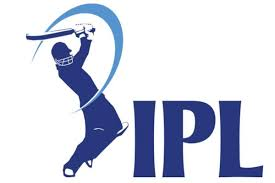

 
Here I want to analyse the stats of IPL using the data available in recommended datasets of https://jovian.ml/forum/t/recommended-datasets-for-course-project/11711

I want to study the players performance and team performance using pandas and numpy commands and to visualize I have used plotlab and seaborn library commands.

With the things learned in this course I just want to apply them in a more effective way by combining the topics covered in the previous 5 lectures.


### Importing Libraries


In [200]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(9,5)
matplotlib.rcParams['figure.facecolor']='#00000000'

# 1. Selecting and Importing a real - world dataset

### Imporing Files

The csv files are downloaded from the recommended datasets and uploaded the files in jupyter notebook.
Import the files which are in csv format to dataframe using pandas.
There are two files. One gives information about ball to ball information and One is about match result and scenario.

In [201]:
pd.set_option('display.max_rows', 10)                       # to display only 10 rows in a data frame
ipl_deliveries=pd.read_csv('deliveries.csv')
ipl_matches=pd.read_csv('matches.csv')

### ipl_matches.csv gives the information about date, city, teams, year held etc.. and the total shape is 756 x 18

In [202]:
ipl_matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


### ipl_deliveries.csv gives details of each and every ball delivered in the ipl from 2008-2019 and the total shape is 179078 x 21

In [203]:
ipl_deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


# 2. Data Preparation and Cleaning

### Here I am selecting data from 2008 to 2016 and cleaning the data by removing the unwanted columns.

In [204]:
ipl_matches_2008_2016=ipl_matches[ipl_matches["season"]<=2016]                            # select matches from 2008 to 2016
selected_columns=['id', 'season', 'city', 'date', 'team1', 'team2', 'result',
                  'winner','win_by_runs','win_by_wickets', 'player_of_match', 'venue']
ipl_matches_2008_2016=ipl_matches_2008_2016[selected_columns].copy()                     # columns are selected as above
ipl_matches_2008_2016

,id,season,city,date,team1,team2,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,normal,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium
60,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,normal,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali"
61,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,normal,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla
62,63,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,normal,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium
63,64,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,normal,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens
...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,normal,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,normal,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,normal,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,normal,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla


#### The dataframe is of 577 x 12 shape

In [205]:
ipl_sample_range=ipl_matches_2008_2016.describe()                    # to get a brief info about data range and values
ipl_sample_range[['season','win_by_runs','win_by_wickets']]

,season,win_by_runs,win_by_wickets
count,577.000000,577.000000,577.000000
mean,2012.029463,13.715771,3.363951
std,2.486247,23.619282,3.416049
min,2008.000000,0.000000,0.000000
25%,2010.000000,0.000000,0.000000
50%,2012.000000,0.000000,3.000000
75%,2014.000000,20.000000,6.000000
max,2016.000000,144.000000,10.000000


The highest win by runs is 144 and win by wickets is 10.The data is ohk and there are no invalid or incorrect results for the selected columns.

.........

### To select the data of ball to ball from ipl_deliveries dataframe with respect to ipl_matches_2008_2016 by selecting and matching unique id

In [206]:
id_selection=ipl_matches_2008_2016.id.unique()  # To select uinique id
id_selection_list=list(id_selection)            # To convert into list

In [208]:
ipl_deliveries_2008_2016=ipl_deliveries[ipl_deliveries['match_id'].isin(id_selection_list)]  # to print the ball to ball details using match id in ipl matches list

In [209]:
ipl_deliveries_2008_2016                

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
13862,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
13863,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
13864,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
13865,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
13866,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


#### The shape is 136598 x 21. And another way of selecting the match details as per ipl_matches_2008_2016 is using id numbers as shown below

In [210]:
ipl_deliveries_2008_2016=ipl_deliveries[(ipl_deliveries["match_id"]>=60) & (ipl_deliveries["match_id"]<=636)]  # To print ball to ball details using id numbers

In [211]:
ipl_deliveries_2008_2016

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
13862,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
13863,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
13864,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
13865,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
13866,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [212]:
ipl_deliveries_2008_2016.columns          # To know the columns in deliveries data frame

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [213]:
ipl_matches_2008_2016.columns            # To know the columns in matches data frame

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'result', 'winner',
       'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [214]:
ipl_deliveries_2008_2016.info()         # To get brief info and datatype for deliveries data frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136598 entries, 13862 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          136598 non-null  int64 
 1   inning            136598 non-null  int64 
 2   batting_team      136598 non-null  object
 3   bowling_team      136598 non-null  object
 4   over              136598 non-null  int64 
 5   ball              136598 non-null  int64 
 6   batsman           136598 non-null  object
 7   non_striker       136598 non-null  object
 8   bowler            136598 non-null  object
 9   is_super_over     136598 non-null  int64 
 10  wide_runs         136598 non-null  int64 
 11  bye_runs          136598 non-null  int64 
 12  legbye_runs       136598 non-null  int64 
 13  noball_runs       136598 non-null  int64 
 14  penalty_runs      136598 non-null  int64 
 15  batsman_runs      136598 non-null  int64 
 16  extra_runs        136598 non-null 

In [215]:
ipl_matches_2008_2016.info()            # To get brief info and datatype for matches data frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 59 to 635
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               577 non-null    int64 
 1   season           577 non-null    int64 
 2   city             570 non-null    object
 3   date             577 non-null    object
 4   team1            577 non-null    object
 5   team2            577 non-null    object
 6   result           577 non-null    object
 7   winner           574 non-null    object
 8   win_by_runs      577 non-null    int64 
 9   win_by_wickets   577 non-null    int64 
 10  player_of_match  574 non-null    object
 11  venue            577 non-null    object
dtypes: int64(4), object(8)
memory usage: 58.6+ KB


In [216]:
ipl_matches_2008_2016.isnull().sum()             # To know null values sum

id                 0
season             0
city               7
date               0
team1              0
                  ..
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
Length: 12, dtype: int64

##### From the above info 3 matches are with no result

# 2. Exploratory analysis and Visualization

#### Here I want to to know more about the match details, result and performances

In [218]:
ipl_deliveries_range=ipl_deliveries_2008_2016.describe()       # to know the range of values in deliveries data frame
ipl_deliveries_range

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000
mean,347.564679,1.482738,10.144585,3.617125,0.000498,0.037782,0.004978,0.022372,0.004480,0.000073,1.215311,0.069686,1.284997
std,165.929865,0.501575,5.673901,1.808200,0.022306,0.260535,0.115512,0.201309,0.074062,0.019132,1.589654,0.353357,1.579014
min,60.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,204.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,348.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,491.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


##### The above table gives you the mean, min and max values of each column

Text(0.5, 1.0, 'matches win by runs')

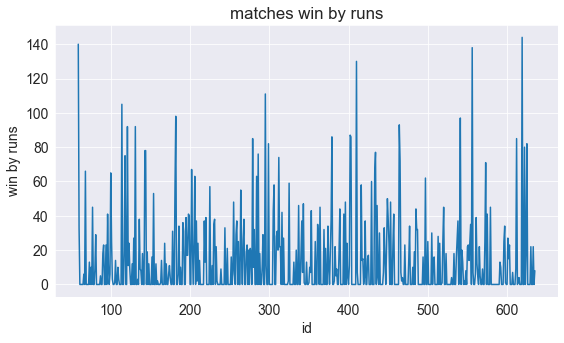

In [219]:
# To plot the win by runs of every match with respect to match id

ipl_matches_2008_2016['win_by_runs'].plot()
plt.xlabel('id')
plt.ylabel('win by runs')
plt.title('matches win by runs')

Text(0.5, 1.0, 'matches win by wickets')

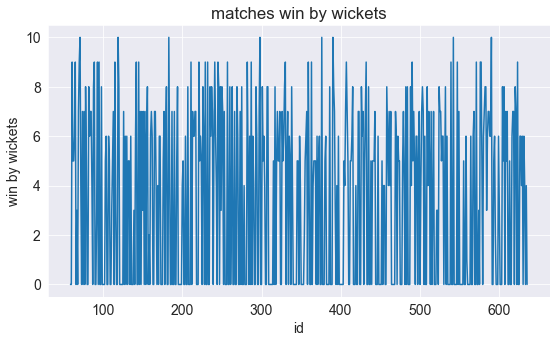

In [220]:
# To plot the win by wickets of every match with respect to match id

ipl_matches_2008_2016['win_by_wickets'].plot()
plt.xlabel('id')
plt.ylabel('win by wickets')
plt.title('matches win by wickets')

Text(0.5, 1.0, 'Distribution of matches win by runs and win by wickets')

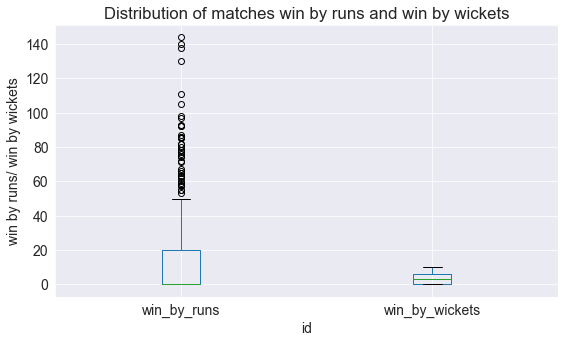

In [221]:
# To plot the win by runs and win by wickets of every match with respect to match id

ipl_matches_2008_2016.boxplot(column=['win_by_runs','win_by_wickets'])
plt.xlabel('id')
plt.ylabel('win by runs/ win by wickets')
plt.title('Distribution of matches win by runs and win by wickets')

#### The above graphs give you the winning scenario in terms of runs and wickets for every match of 2008 to 2016.

# 3. Asking and Answeing Questions

#### 1. How to get the details of no result matches and match scenario ???
#### 2. Total runs In IPL 2008_2016 ???
#### 3. No.of fours hit by the players during 2008-2016 IPL season ???
#### 4. No.of sixes hit by the players during 2008-2016 IPL season ???
#### 5. Which teams participated in IPL during 2008-2016 ???
#### 6. Total matches happened in each season ???
#### 7. How is the distribution of runs scored in IPL during 2008-2016 ???
#### 8. What is the distribution of runs and Total runs scored by each team during 2008-2016 ???
#### 9. Plot a graph for the teams overall runs scored during the IPL 2008 to 2016.
#### 10. What are the Teams with Highest Total runs scored ???
#### 11. Display the player names and their respective runs scored in IPL during 2008-2016 ???
#### 12. What is the highest number of runs and the top performances in batting ???
#### 13. What is the Total no.of wickets or dismissals taken by a bowler including run-outs and other types during IPL 2008-2016.
#### 14. What is the Head to head wickets between bowlers and batsmen including all types of dismissals ???
#### 15. What are the runs scored in each over in entire IPL during 2008-2016 ???
#### 16. What are the Overs with Highest runs ???
#### 17. What are the total No.of wickets in each over during IPL 2008-2016 ???
#### 18. What are the overs with highest no.of wickets during IPL 2008-2016 ???
#### 19. Wickets taken by bowlers during IPL 2008-2016 ???
#### 20. No.of wickets taken by individial bowlers and the top performers in IPL during 2008-2016 ???
#### 21. Display head to head dismissals between bowlers and the batsmen in IPL 2008-2016 ???
#### 22. Who is having most no.of head to head dismissals in IPl 2008-2016 and the respective bowlers and batsmen names ???


#### Question 1

#####  How to get the details of no result matches and match scenario ???

In [222]:
# First find the rows and columns with NaN values

find_NaN = ipl_matches_2008_2016.isnull()                      # find NaN values 
row_with_NaN_ipl_matches_2008_2016 = find_NaN.any(axis=1)      # find rows with NaN values
rows_with_NaN_ipl_matches_2008_2016 = ipl_matches_2008_2016[row_with_NaN_ipl_matches_2008_2016]

In [223]:
(rows_with_NaN_ipl_matches_2008_2016)

,id,season,city,date,team1,team2,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,no result,NaN,0,0,NaN,Feroz Shah Kotla
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,normal,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,normal,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,normal,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,normal,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,normal,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,normal,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,normal,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,no result,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,no result,NaN,0,0,NaN,M Chinnaswamy Stadium


#### These are the rows with NaN values in city, winner and player of match columns.

In [224]:
rows_with_NaN_ipl_matches_2008_2016.shape                         # To know the rows and columns length

(10, 12)

In [225]:
matches_with_result=ipl_matches_2008_2016['winner']             # To know the result or values of winner column in dataframe
matches_with_result

59           Kolkata Knight Riders
60             Chennai Super Kings
61                Delhi Daredevils
62     Royal Challengers Bangalore
63           Kolkata Knight Riders
                  ...             
631    Royal Challengers Bangalore
632    Royal Challengers Bangalore
633            Sunrisers Hyderabad
634            Sunrisers Hyderabad
635            Sunrisers Hyderabad
Name: winner, Length: 577, dtype: object

In [226]:
matches_with_result.isnull().sum()               # to know the null sum

3

#### 3 matches are no result matches and the match details are as follows.

In [227]:
matches_with_no_result=ipl_matches_2008_2016.loc[ipl_matches['winner'].isnull()]     # to find the location of no match result
matches_with_no_result

,id,season,city,date,team1,team2,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,no result,NaN,0,0,NaN,Feroz Shah Kotla
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,no result,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,no result,NaN,0,0,NaN,M Chinnaswamy Stadium


In [228]:
get_id_no_result_matches=matches_with_no_result.id.unique()         # to get unique ids to avoid repetition
id_list=list(get_id_no_result_matches)
no_result_match_details=ipl_deliveries_2008_2016[ipl_deliveries_2008_2016["match_id"].isin(id_list)]   # use id to print no result match details
no_result_match_details

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
70930,301,1,Delhi Daredevils,Pune Warriors,1,1,NV Ojha,DA Warner,AC Thomas,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
70931,301,1,Delhi Daredevils,Pune Warriors,1,2,DA Warner,NV Ojha,AC Thomas,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
70932,301,1,Delhi Daredevils,Pune Warriors,1,3,NV Ojha,DA Warner,AC Thomas,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
70933,301,1,Delhi Daredevils,Pune Warriors,1,4,NV Ojha,DA Warner,AC Thomas,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
70934,301,1,Delhi Daredevils,Pune Warriors,1,5,NV Ojha,DA Warner,AC Thomas,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135164,571,2,Royal Challengers Bangalore,Delhi Daredevils,1,3,CH Gayle,V Kohli,J Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
135165,571,2,Royal Challengers Bangalore,Delhi Daredevils,1,4,CH Gayle,V Kohli,J Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
135166,571,2,Royal Challengers Bangalore,Delhi Daredevils,1,5,CH Gayle,V Kohli,J Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
135167,571,2,Royal Challengers Bangalore,Delhi Daredevils,1,6,CH Gayle,V Kohli,J Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


.............

#### Question 2

#### Total runs In IPL 2008_2016 ???

In [229]:
ipl_deliveries_2008_2016['total_runs'].count()       # It gives you the count i.e not the sum but just the count number

136598

In [230]:
ipl_deliveries_2008_2016['total_runs'].sum()        # It gives you the total runs scored.

175528

#### Total of 175528 runs were scored in 136598 balls during the 2008-2016 IPL season.

#### Question 3

#### No.of fours hit by the players during 2008-2016 IPL season ???


In [231]:
Total_fours=((ipl_deliveries_2008_2016['total_runs']==4))   # It gives boolean result and it includes extra runs also

In [232]:
sum(Total_fours)                    

15625

In [233]:
Total_fours=((ipl_deliveries_2008_2016['total_runs']==4) & (ipl_deliveries_2008_2016['extra_runs']==0))    # It includes only fours

In [234]:
sum(Total_fours)

15350

#### A total of 15350 fours wer hit during 2008-2016.

#### Question 4
#### No.of sixes hit by the players during 2008-2016 IPL season ???

In [235]:
Total_sixes=((ipl_deliveries_2008_2016['total_runs']==6) & (ipl_deliveries_2008_2016['extra_runs']==0))

In [236]:
sum(Total_sixes)

5784

#### A total of 5784 sixes were hit during 2008-2016.

#### Question 5
#### Which teams participated in IPL during 2008-2016 ???

In [237]:
ipl_matches_2008_2016['team1'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions'], dtype=object)

#### Question 6
#### Total matches happened in each season ???

In [238]:
total_matches_each_season=ipl_matches_2008_2016.groupby("season")     # to collect information or gather or grouping with respect to season column
matches_in_each_season=total_matches_each_season['id'].count()
matches_in_each_season

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
Name: id, dtype: int64

Text(0, 0.5, 'No.of matches')

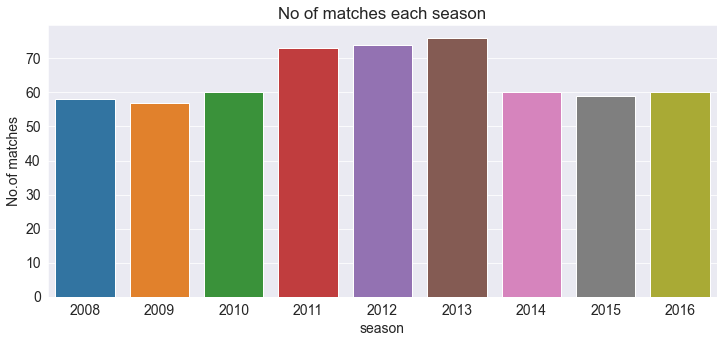

In [239]:
# To plot the graph for the above details

plt.figure(figsize=(12,5))
plt.title('No of matches each season')
sns.barplot(matches_in_each_season.index,matches_in_each_season)
plt.ylabel("No.of matches")

#### Question 7
#### How is  the distribution of runs scored in IPL during 2008-2016 ???

In [240]:
distribution_of_runs=ipl_deliveries_2008_2016.groupby('total_runs')['match_id'].count()    # count is used to know no.of time a specific run is scored
distribution_of_runs

total_runs
0    48754
1    56189
2     9351
3      555
4    15625
5      306
6     5784
7       34
Name: match_id, dtype: int64

#### A total of 5784 sixes and 15625 fours were recorded in IPL 2008 to 2016 and max number is in the form of ones and min in the form of seven runs (including six and no ball or in the form of extra runs)

Text(0, 0.5, 'Frequency')

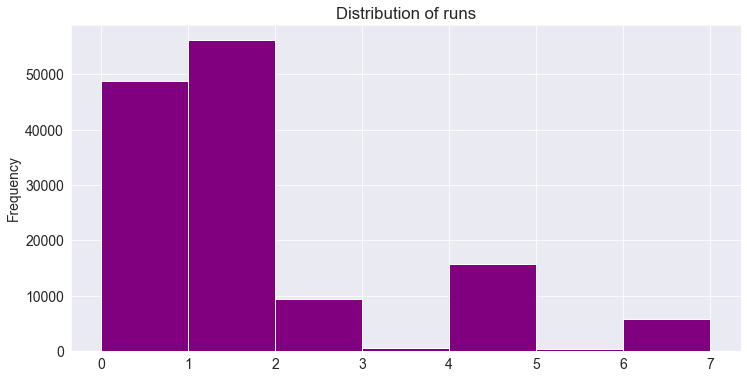

In [241]:
# Using histogram

plt.figure(figsize=(12,6))
plt.title("Distribution of runs")
plt.hist(ipl_deliveries_2008_2016.total_runs, bins=7, color='purple')
plt.ylabel("Frequency")

Text(0, 0.5, 'Number for each type of run')

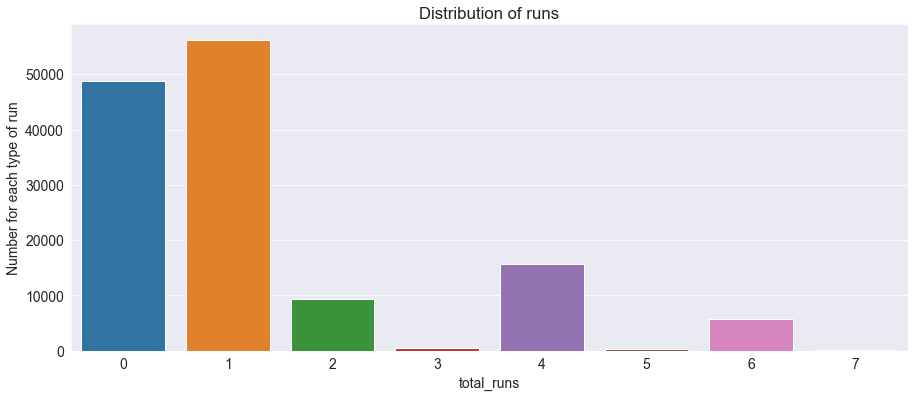

In [242]:
# Using bar charts

plt.figure(figsize=(15,6))
plt.title("Distribution of runs")
sns.barplot(distribution_of_runs.index,distribution_of_runs)
plt.xlabel("total_runs")
plt.ylabel("Number for each type of run")

#### Using histogram gives you the distribution of runs and with bar charts it gives you the direct number of ones, twos,......

Text(0.5, 0, 'total_runs')

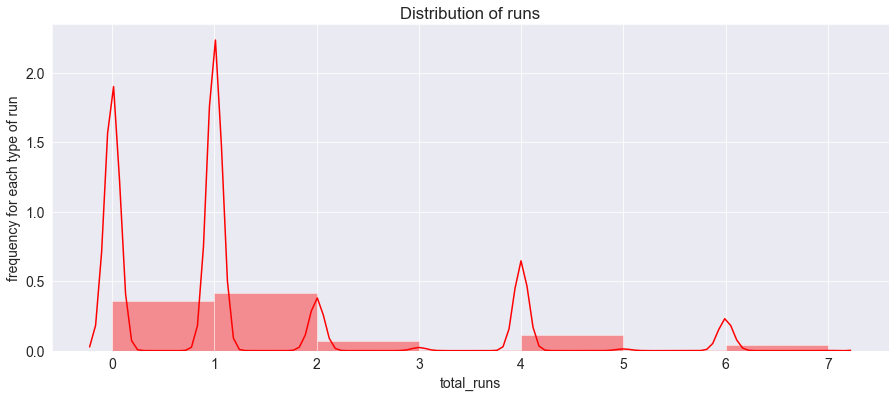

In [244]:
# To know the density and distribution of values

plt.figure(figsize=(15,6))
plt.title("Distribution of runs")
sns.distplot(ipl_deliveries_2008_2016['total_runs'],color='red',bins=7)
plt.ylabel("frequency for each type of run")
plt.xlabel('total_runs')

#### Using distribution plot gives you the number and density combining the above graphs.

#### Question 8
#### What is the distribution of runs and Total runs scored by each team during 2008-2016 ???

In [245]:
range_total_runs_by_teams=ipl_deliveries_2008_2016.groupby('batting_team')['total_runs'].value_counts()  # To print the specific values with the grouping mentioned
pd.set_option('display.max_rows', 10)
range_total_runs_by_teams

batting_team         total_runs
Chennai Super Kings  1             6570
                     0             5382
                     4             1792
                     2             1163
                     6              740
                                   ... 
Sunrisers Hyderabad  2              544
                     6              291
                     3               32
                     5               17
                     7                3
Name: total_runs, Length: 101, dtype: int64

In [246]:
total_runs_by_teams=ipl_deliveries_2008_2016.groupby('batting_team')['total_runs'].sum()   # To get each team Total runs scored
total_runs_by_teams

batting_team
Chennai Super Kings            20899
Deccan Chargers                11463
Delhi Daredevils               19734
Gujarat Lions                   2450
Kings XI Punjab                20861
                               ...  
Pune Warriors                   6358
Rajasthan Royals               17703
Rising Pune Supergiants         2063
Royal Challengers Bangalore    21591
Sunrisers Hyderabad             9303
Name: total_runs, Length: 13, dtype: int64

#### Question 9
#### Plot a graph for the teams overall runs scored during the IPL 2008 to 2016

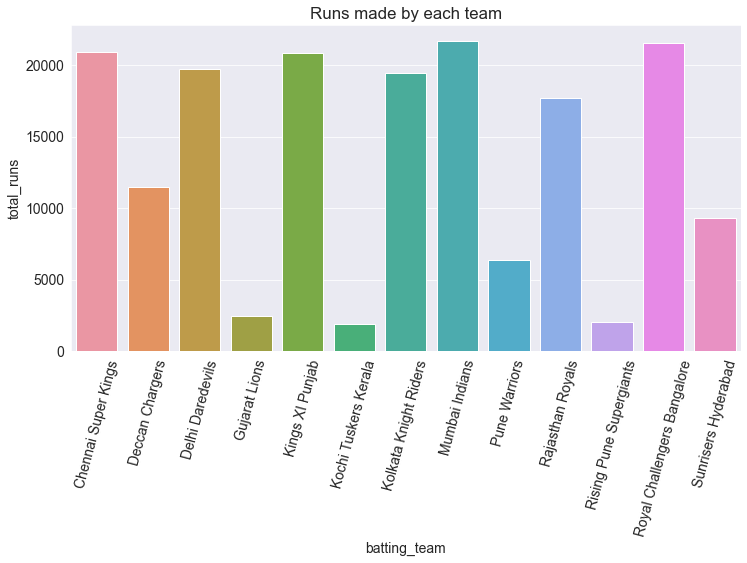

In [247]:
# To plot the bar graph for teams and their runs scored

plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Runs made by each team')
sns.barplot(total_runs_by_teams.index,total_runs_by_teams)

#### Question 10
#### What are the Teams with Highest Total runs scored ???

In [249]:
total_runs_by_teams.nlargest(13)        # to get largest team scores or total runs

batting_team
Mumbai Indians                 21721
Royal Challengers Bangalore    21591
Chennai Super Kings            20899
Kings XI Punjab                20861
Delhi Daredevils               19734
                               ...  
Sunrisers Hyderabad             9303
Pune Warriors                   6358
Gujarat Lions                   2450
Rising Pune Supergiants         2063
Kochi Tuskers Kerala            1901
Name: total_runs, Length: 13, dtype: int64

#### Question 11
#### Display the player names and their respective runs scored in IPL during 2008-2016.

In [250]:
player_runs=ipl_deliveries_2008_2016.groupby("batsman")['total_runs'].sum()  # To add the scores made by batsmen
pd.set_option('display.max_rows', None)
player_runs

batsman
A Ashish Reddy           288
A Chandila                 4
A Chopra                  58
A Flintoff                72
A Kumble                  42
A Mishra                 319
A Mithun                  37
A Mukund                  20
A Nehra                   49
A Singh                    3
A Symonds               1028
A Uniyal                   4
A Zampa                    0
AA Bilakhia               78
AA Chavan                 12
AA Jhunjhunwala          235
AA Noffke                 11
AB Agarkar               193
AB Barath                 44
AB Dinda                  22
AB McDonald              130
AB de Villiers          3388
AC Blizzard              126
AC Gilchrist            2215
AC Thomas                 20
AC Voges                 190
AD Mascarenhas            81
AD Mathews               732
AD Nath                   20
AD Russell               615
AG Murtaza                10
AG Paunikar               56
AJ Finch                1386
AL Menaria               416
AM Nay

In [251]:
player_runs.shape

(435,)

#### Question 12
#### What is the highest number of runs and the top performances in batting  ???

In [252]:
highest_runs=player_runs.max()
highest_runs

4291

In [253]:
Top_10_batsmen=player_runs.nlargest(10)
Top_10_batsmen

batsman
SK Raina          4291
V Kohli           4274
RG Sharma         3985
G Gambhir         3857
CH Gayle          3697
RV Uthappa        3590
DA Warner         3543
MS Dhoni          3421
AB de Villiers    3388
S Dhawan          3259
Name: total_runs, dtype: int64

Text(0, 0.5, 'no.of runs')

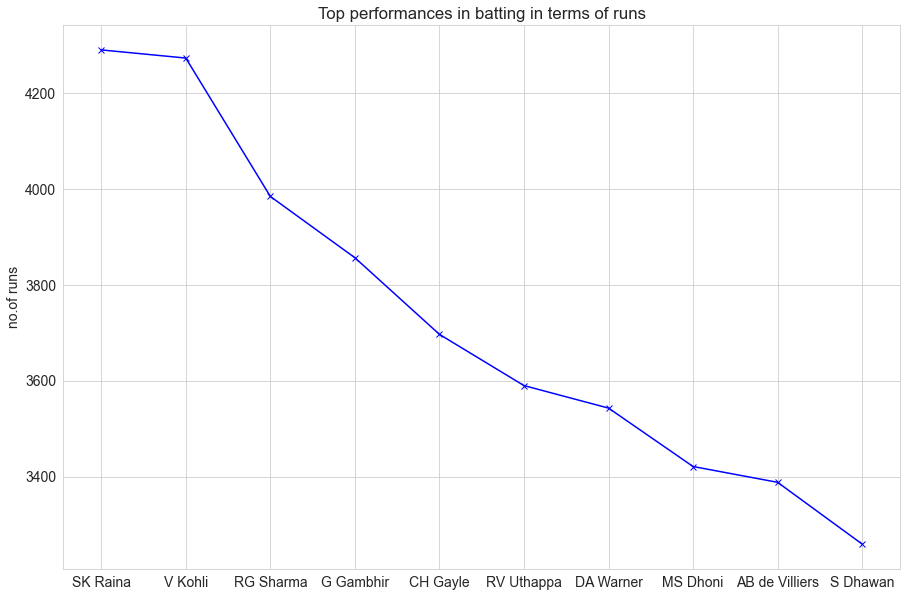

In [254]:
# To plot the graph for Top batting performers

sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
plt.plot(Top_10_batsmen,marker='x',c='b')
plt.title("Top performances in batting in terms of runs")
plt.ylabel('no.of runs')

#### Question 13
#### What is the Total no.of wickets or dismissals taken by a bowler including run-outs and other types during IPL 2008-2016. 

In [255]:
player_wickets=ipl_deliveries_2008_2016.groupby("bowler")["player_dismissed"].count()
pd.set_option('display.max_rows', None)
player_wickets

bowler
A Ashish Reddy        19
A Chandila            11
A Flintoff             2
A Kumble              49
A Mishra             132
A Mithun               8
A Nehra              111
A Nel                  1
A Singh               31
A Symonds             23
A Uniyal               3
A Zampa               12
AA Chavan              8
AA Jhunjhunwala        1
AA Kazi                1
AA Noffke              1
AB Agarkar            33
AB Dinda              80
AB McDonald           14
AC Gilchrist           1
AC Thomas             16
AC Voges               1
AD Mascarenhas        19
AD Mathews            28
AD Russell            36
AF Milne               1
AG Murtaza            12
AJ Finch               1
AL Menaria             3
AM Nayar               9
AM Rahane              1
AM Salvi               7
AN Ahmed              15
AP Dole                5
AR Patel              46
AS Rajpoot             4
AS Raut                0
AUK Pathan             0
Abdur Razzak           0
Anand Rajan       

In [256]:
player_wickets.sum()

6727

#### A total of 6727 wickets including all types of dismissals.

#### Question 14 
#### What is the Head to head wickets between bowlers and batsmen including all types of dismissals ???

In [257]:
specific_player_wickets=ipl_deliveries_2008_2016.groupby("bowler")["player_dismissed"].value_counts()
pd.set_option('display.max_rows', None)
specific_player_wickets

bowler             player_dismissed    
A Ashish Reddy     RV Uthappa              3
                   V Kohli                 2
                   DJG Sammy               1
                   F du Plessis            1
                   G Gambhir               1
                   JEC Franklin            1
                   LRPL Taylor             1
                   M Muralitharan          1
                   MA Agarwal              1
                   MN Samuels              1
                   MS Dhoni                1
                   Mandeep Singh           1
                   N Saini                 1
                   R Vinay Kumar           1
                   RA Jadeja               1
                   Yuvraj Singh            1
A Chandila         AP Majumdar             1
                   CL White                1
                   JD Ryder                1
                   M Vijay                 1
                   Mandeep Singh           1
               

In [258]:
specific_player_wickets.sum()

6727

#### Question 15
#### What are the runs scored in each over in entire IPL during 2008-2016 ???

In [259]:
runs_in_each_over=ipl_deliveries_2008_2016.groupby('over')['total_runs'].sum()
runs_in_each_over

over
1     6945
2     8072
3     8762
4     9203
5     9225
6     9290
7     7619
8     8151
9     8325
10    8168
11    8556
12    8781
13    8728
14    8941
15    9262
16    9442
17    9884
18    9955
19    9493
20    8726
Name: total_runs, dtype: int64

Text(0.5, 1.0, 'Total runs scored in each over for the ipl 2008-2016')

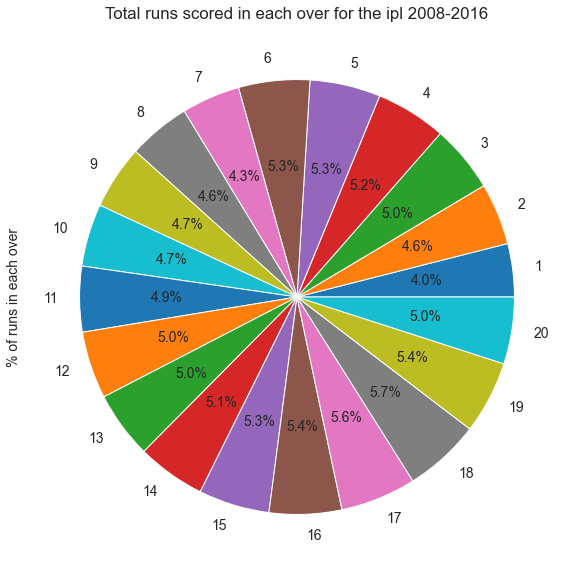

In [260]:
# To plot the pie chart for the runs in each over

plt.figure(figsize=(10,10))
runs_in_each_over.plot.pie(autopct='%1.1f%%')
plt.ylabel("% of runs in each over")
plt.title('Total runs scored in each over for the ipl 2008-2016')

#### Question 16
#### What are the Overs with Highest runs ???

In [261]:
runs_in_each_over.nlargest(20)

over
18    9955
17    9884
19    9493
16    9442
6     9290
15    9262
5     9225
4     9203
14    8941
12    8781
3     8762
13    8728
20    8726
11    8556
9     8325
10    8168
8     8151
2     8072
7     7619
1     6945
Name: total_runs, dtype: int64

#### From above The death and powerplay overs are with highest runs.

#### Question 17
#### No.of wickets in each over during IPL 2008-2016

In [262]:
wickets_in_each_over=ipl_deliveries_2008_2016.groupby('over')['player_dismissed'].count()
wickets_in_each_over

over
1     236
2     269
3     296
4     282
5     295
6     290
7     241
8     243
9     278
10    263
11    300
12    285
13    284
14    317
15    340
16    375
17    411
18    506
19    538
20    678
Name: player_dismissed, dtype: int64

Text(0.5, 1.0, 'Total wickets in each over for the ipl 2008-2016')

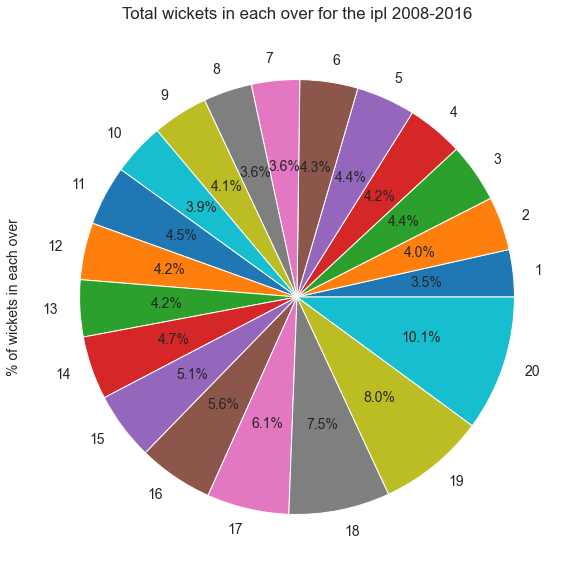

In [263]:
plt.figure(figsize=(10,10))
wickets_in_each_over.plot.pie(autopct='%1.1f%%')
plt.ylabel("% of wickets in each over")
plt.title('Total wickets in each over for the ipl 2008-2016')

#### Question 18
#### What are the overs with highest no.of wickets  during IPL 2008-2016.

In [264]:
wickets_in_each_over.nlargest(8)

over
20    678
19    538
18    506
17    411
16    375
15    340
14    317
11    300
Name: player_dismissed, dtype: int64

In [265]:
wickets_in_each_over.sum()

6727

In [266]:
import jovian

In [267]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mouli-miracles/course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/mouli-miracles/course-project


'https://jovian.ml/mouli-miracles/course-project'

#### Question 19
#### Wickets taken by bowlers during IPL 2008-2016

In [268]:
ipl_deliveries_2008_2016["dismissal_kind"].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [269]:
dismissal_selection=['caught','bowled','lbw','stumped','caught and bowled'] # Only these dismissals comes under bowlers account

In [270]:
wickets_by_bowlers=ipl_deliveries_2008_2016[ipl_deliveries_2008_2016["dismissal_kind"].isin(dismissal_selection)] # to print only bowler dismissals
pd.set_option('display.max_rows', 10)
wickets_by_bowlers

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
13895,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,6,2,SC Ganguly,BB McCullum,Z Khan,0,...,0,0,0,0,0,0,0,SC Ganguly,caught,JH Kallis
13936,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,13,1,RT Ponting,BB McCullum,JH Kallis,0,...,0,0,0,0,0,0,0,RT Ponting,caught,P Kumar
13968,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,18,1,DJ Hussey,BB McCullum,AA Noffke,0,...,0,0,0,0,0,0,0,DJ Hussey,caught,CL White
13993,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,1,R Dravid,W Jaffer,I Sharma,0,...,0,0,0,0,0,0,0,R Dravid,bowled,NaN
14000,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,3,2,V Kohli,W Jaffer,AB Dinda,0,...,0,0,0,0,0,0,0,V Kohli,bowled,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150402,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,11,3,CH Gayle,V Kohli,BCJ Cutting,0,...,0,0,0,0,0,0,0,CH Gayle,caught,Bipul Sharma
150416,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,5,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,0,0,0,V Kohli,bowled,NaN
150422,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,14,5,AB de Villiers,KL Rahul,Bipul Sharma,0,...,0,0,0,0,0,0,0,AB de Villiers,caught,MC Henriques
150432,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,16,3,KL Rahul,SR Watson,BCJ Cutting,0,...,0,0,0,0,0,0,0,KL Rahul,bowled,NaN


#### A total of 6013 wickets were taken by bowlers during IPL 2008-2016

#### Question 20
#### No.of wickets taken by individial bowlers and the top performers in IPL during 2008-2016 ???

In [271]:
pd.set_option('display.max_rows', None)
bowler_wickets=wickets_by_bowlers.groupby("bowler")["player_dismissed"].count()  # to print bowlers wickets
bowler_wickets

bowler
A Ashish Reddy        18
A Chandila            11
A Flintoff             2
A Kumble              45
A Mishra             124
A Mithun               7
A Nehra               98
A Nel                  1
A Singh               28
A Symonds             20
A Uniyal               2
A Zampa               12
AA Chavan              8
AA Jhunjhunwala        1
AA Noffke              1
AB Agarkar            29
AB Dinda              68
AB McDonald           11
AC Gilchrist           1
AC Thomas             14
AD Mascarenhas        19
AD Mathews            27
AD Russell            31
AF Milne               1
AG Murtaza             9
AJ Finch               1
AL Menaria             3
AM Nayar               9
AM Rahane              1
AM Salvi               7
AN Ahmed              12
AP Dole                5
AR Patel              42
AS Rajpoot             4
Anand Rajan            8
Ankit Sharma          12
Anureet Singh         17
Azhar Mahmood         29
B Akhil                6
B Geeves          

In [272]:
bowler_wickets.nlargest()

bowler
SL Malinga         143
A Mishra           124
DJ Bravo           122
PP Chawla          120
Harbhajan Singh    118
Name: player_dismissed, dtype: int64

In [273]:
bowler_wickets.sum()

6013

#### 6727 wickets includes other type of dismissals which is the no.of player dismissals, where as the 6013 refers to only bowler wickets

#### Question 21
#### Display head to head dismissals between bowlers and the batsmen in IPL 2008-2016.

In [274]:
pd.set_option('display.max_rows', None)
head_to_head_dismissals=wickets_by_bowlers.groupby("bowler")["player_dismissed"].value_counts()
head_to_head_dismissals

bowler             player_dismissed    
A Ashish Reddy     RV Uthappa              3
                   V Kohli                 2
                   DJG Sammy               1
                   G Gambhir               1
                   JEC Franklin            1
                   LRPL Taylor             1
                   M Muralitharan          1
                   MA Agarwal              1
                   MN Samuels              1
                   MS Dhoni                1
                   Mandeep Singh           1
                   N Saini                 1
                   R Vinay Kumar           1
                   RA Jadeja               1
                   Yuvraj Singh            1
A Chandila         AP Majumdar             1
                   CL White                1
                   JD Ryder                1
                   M Vijay                 1
                   Mandeep Singh           1
                   NLTC Perera             1
               

In [275]:
head_to_head_dismissals.max()

7

#### Question 22
#### Who is having most no.of head to head dismissals in IPl 2008-2016 and the respective bowlers and batsmen names ???

In [276]:
head_to_head_dismissals.nlargest(10)

bowler         player_dismissed
Z Khan         MS Dhoni            7
A Nehra        V Kohli             6
B Kumar        AM Rahane           6
PP Ojha        MS Dhoni            6
R Vinay Kumar  RG Sharma           6
B Kumar        PA Patel            5
DJ Bravo       RG Sharma           5
MM Sharma      AT Rayudu           5
PP Ojha        G Gambhir           5
R Sharma       KC Sangakkara       5
Name: player_dismissed, dtype: int64

In [277]:
import jovian

In [278]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mouli-miracles/course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/mouli-miracles/course-project


'https://jovian.ml/mouli-miracles/course-project'

# 5. Summary and Conclusion

#### In this course project I have learned and applied the various commands to study and analyse the IPL Data.
#### 1.In anslysis I presented that, bowler wickets and the player dismissals are different and how the commands used to calculate separately.
#### 2.Total fours and total sixes and the distribution of runs for the entire IPl and individual teams are discussed.
#### 3.Top batsmen and bowler details have been identified and presented.
#### 4.Interesting one of head to head dismissals is taken out from data.
#### 5.Plots of various types are presented (bar,scatter,histogram,pie)

### Future work includes deep study of boundary percentage and the player performance and type of shots he played and many more if data is available with each and every minute detail.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
